# Time Lapse Camera

In this lesson, you will learn:

1. Check camera connectivity
2. Take a picture using cv2
3. Write a program to capture multiple images
4. Add delay between capture using `time.sleep`
5. Learn to use for loop
6. Use ffmpeg to create a animated gif
7. Project - A better time lapse photo

## Check camera connectivity

Run the following command. It should display

`supported=1 detected=1, libcamera interfaces=0`

If `detected=0`, your camera is not connected properly.

In [5]:
!vcgencmd get_camera

supported=1 detected=1, libcamera interfaces=0


## Take a picture using cv2

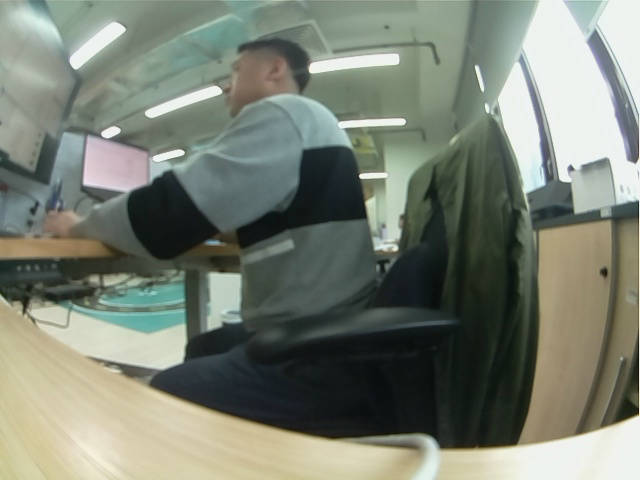

In [6]:
import cv2
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

# Capture a single frame
ret, frame = cap.read()

# Save the captured image
if ret:
    flipped_frame = cv2.flip(frame, 0)    
    display(Image(data=cv2.imencode('.jpeg', flipped_frame)[1].tobytes()))    

# Release the camera
cap.release()

Notes:
- If `can't open camera by index`, restart the notebook instance

## Define a function to capture a frame

Let's define this function to help us easier to capture an image

In [7]:
### Define a function

In [8]:
def capture_image(cap, filename):
    # Capture a single frame
    ret, frame = cap.read()
    
    # Save the captured image
    if ret:
        flipped_frame = cv2.flip(frame, 0)
        cv2.imwrite(f"camera_output/{filename}", flipped_frame) # Write this image to disk
        print(f"{filename} saved")

In [9]:
### Create the directory to store image

In [10]:
!mkdir -p camera_output

## Capture multiple images

### Task: Modify the code below to capture 5 images.

In [11]:
import cv2
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

capture_image(cap, "1.jpg")

# Release the camera
cap.release()

1.jpg saved


Note:
- The images are stored in the folder named `camera_output`

### Answer

In [12]:
import cv2
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

capture_image(cap, "1.jpg")
capture_image(cap, "2.jpg")
capture_image(cap, "3.jpg")
capture_image(cap, "4.jpg")
capture_image(cap, "5.jpg")

# Release the camera
cap.release()

1.jpg saved
2.jpg saved
3.jpg saved
4.jpg saved
5.jpg saved


## Take a picture every 10 seconds

- Right now the program take a series of pictures without delay.
- What if we want it to wait 10 seconds before taking the next one?
- How do we create a delay between the calls to `capture_image` function?

### 1. The sleep function

- There is a function in python called `time.sleep(n)`. 
- The program will sleep for n seconds before it moves to the next line

#### Example
The following program will say "hello", wait 1 second, then say "hello again"

In [13]:
import time

print("hello")
time.sleep(1)
print("hello again")

hello
hello again


#### Exercise

Modify the following program to `wait 5 seconds` before saying "hello again"

In [14]:
import time

print("hello")
time.sleep(1)
print("hello again")

hello
hello again


#### Answer

In [15]:
import time

print("hello")
time.sleep(5)
print("hello again")

hello
hello again


### 2. Add time delay to our camera program

- Import the time library
- Add a **10 seconds delay** between the 1st and 2nd pictures

In [16]:
import cv2
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

capture_image(cap, "1.jpg")
capture_image(cap, "2.jpg")

# Release the camera
cap.release()

1.jpg saved
2.jpg saved


#### Answer

In [17]:
import cv2
import time
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

capture_image(cap, "1.jpg")
time.sleep(10)
capture_image(cap, "2.jpg")

# Release the camera
cap.release()

1.jpg saved
2.jpg saved


## For loop

A for loop allows you to repeat a set of instructions for a specific number of times

### Examples

The following program print from 0 to 4

In [18]:
for i in range(0,5):
    print(i)

0
1
2
3
4


Note:
1. The `print(i)` statement is indented.
2. All statements under the for loop must be indented properly.

### Exercise

Use for loop to print from 1 to 10

In [19]:
for i in range(0,5):
    print(i)

0
1
2
3
4


#### Answer

In [20]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


### Task: Try to print two line per loop

How do you print the following?

```
1
2
2
3
3
4
```

In [21]:
for i in range(1,3):
    print(i)

1
2


#### Answer

In [22]:
for i in range(1,3):
    print(i)
    print(i+1)

1
2
2
3


### Add delay in for loop

Can you use `time.sleep(n)` to print one line per 1 second?

In [23]:
import time

for i in range(0,5):
    print(i)

0
1
2
3
4


#### Answer

In [24]:
import time

for i in range(0,5):
    print(i)
    time.sleep(1)

0
1
2
3
4


## Use for loop to capture images

Change the following program to:
- Use for loop to capture 10 images
- Delay each capture by 1 second

In [25]:
import cv2
import time
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

capture_image(cap, "1.jpg")
time.sleep(10)
capture_image(cap, "2.jpg")

# Release the camera
cap.release()

1.jpg saved
2.jpg saved


### Hints #1 - String concat
To concatenate an integer and a string, you need to convert the integer to string first using `str(n)`

In [26]:
# Example
i = 1
print(str(i)+".jpg")

1.jpg


### Answer

In [27]:
import cv2
import time
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

for i in range(10):
    capture_image(cap, str(i)+ ".jpg")
    time.sleep(1)

# Release the camera
cap.release()

0.jpg saved
1.jpg saved
2.jpg saved
3.jpg saved
4.jpg saved
5.jpg saved
6.jpg saved
7.jpg saved
8.jpg saved
9.jpg saved


## Use ffmpeg to create a time lapse image

We now have a lot of images in our camera folder

In [28]:
!ls camera_output

0.jpg  1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg	8.jpg  9.jpg


But they are static images. Do you know what a gif image is? Here is a sample

<img src="images/gif_sample_shibu_meme.webp" />

We can use a command named `ffmpeg` to create a gif using the images we capture

Read this website if you have time:
[How to Make GIFs from Images Using FFmpeg](https://www.bannerbear.com/blog/how-to-make-gifs-from-images-using-ffmpeg/)

In [29]:
!ffmpeg -y -loglevel 0 -i camera_output/%d.jpg output.gif

### Show the result

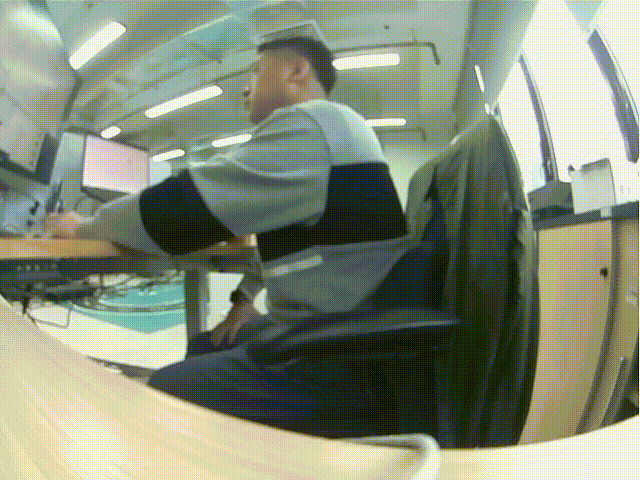

In [30]:
Image(filename="output.gif")

## Project: A better time lapse photo

Put the camera in an interesting position and set a reasonable delay. Capture the image and create a gif.

Ideas:
- Busy city street during rush hour.
- Clouds moving across the sky.
- Flower blooming from bud to full bloom.
- Sunrise or sunset over a picturesque landscape.
